
# P300 Load and Visualize Data

This example demonstrates loading, organizing, and visualizing ERP response data from the visual P300 experiment. The experiment uses a visual oddball paradigm. Images of cats and dogs are shwn in a rapid serial visual presentation (RSVP) stream, with cats and dogs categorized respectively as 'targets' or 'non-targets', according to which has high or low probability of occurring, respectively. 

The data used is the first subject and first session of the one of the eeg-expy P300 example datasets, recorded using the InteraXon MUSE EEG headset (2016 model). This session consists of six two-minute blocks of continuous recording.  

We first use the `fetch_datasets` to obtain a list of filenames. If these files are not already present 
in the specified data directory, they will be quickly downloaded from the cloud. 

After loading the data, we place it in an MNE `Epochs` object, and obtain the trial-averaged response. 

The final figure plotted at the end shows the P300 response ERP waveform. 


## Setup



In [1]:
# Some standard pythonic imports
import os
from matplotlib import pyplot as plt
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

# MNE functions
from mne import Epochs,find_events

# EEG-Notebooks functions
from eegnb.analysis.analysis_utils import load_data,plot_conditions
from eegnb.datasets import fetch_dataset

Load Data
 ---------------------

 We will use the eeg-expy N170 example dataset

 Note that if you are running this locally, the following cell will download
 the example dataset, if you do not already have it.

##################################################################################################



In [2]:
eegnb_data_path = os.path.join(os.path.expanduser('~/'),'.eegnb', 'data')    
p300_data_path = os.path.join(eegnb_data_path, 'visual-P300', 'eegnb_examples')

# If dataset hasn't been downloaded yet, download it 
if not os.path.isdir(p300_data_path):
    fetch_dataset(data_dir=eegnb_data_path, experiment='visual-P300', site='eegnb_examples');        


subject = 1
session = 1
raw = load_data(subject,session,
                experiment='visual-P300', site='eegnb_examples', device_name='muse2016',
                data_dir = eegnb_data_path)

Downloading...
From: https://drive.google.com/uc?id=1OLcj-zSjqdNrsBSUAsGBXOwWDnGWTVFC
To: C:\Users\pavit\.eegnb\data\downloaded_data.zip
100%|██████████| 18.4M/18.4M [00:05<00:00, 3.66MB/s]




Loading these files: 

C:\Users\pavit\.eegnb\data\visual-P300\eegnb_examples\muse2016\subject0001\session001\data_2017-02-04-15_45_13.csv

C:\Users\pavit\.eegnb\data\visual-P300\eegnb_examples\muse2016\subject0001\session001\data_2017-02-04-15_47_49.csv

C:\Users\pavit\.eegnb\data\visual-P300\eegnb_examples\muse2016\subject0001\session001\data_2017-02-04-15_51_07.csv

C:\Users\pavit\.eegnb\data\visual-P300\eegnb_examples\muse2016\subject0001\session001\data_2017-02-04-15_55_07.csv

C:\Users\pavit\.eegnb\data\visual-P300\eegnb_examples\muse2016\subject0001\session001\data_2017-02-04-15_58_30.csv

C:\Users\pavit\.eegnb\data\visual-P300\eegnb_examples\muse2016\subject0001\session001\data_2017-02-04-16_03_08.csv




['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'st

## Visualize the power spectrum



NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


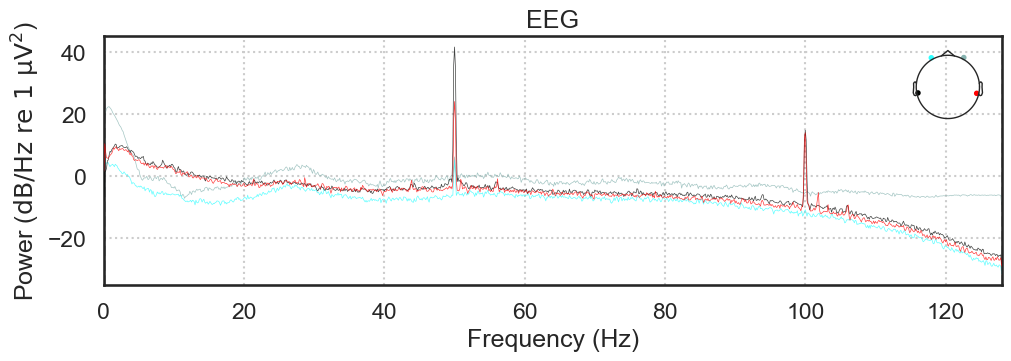

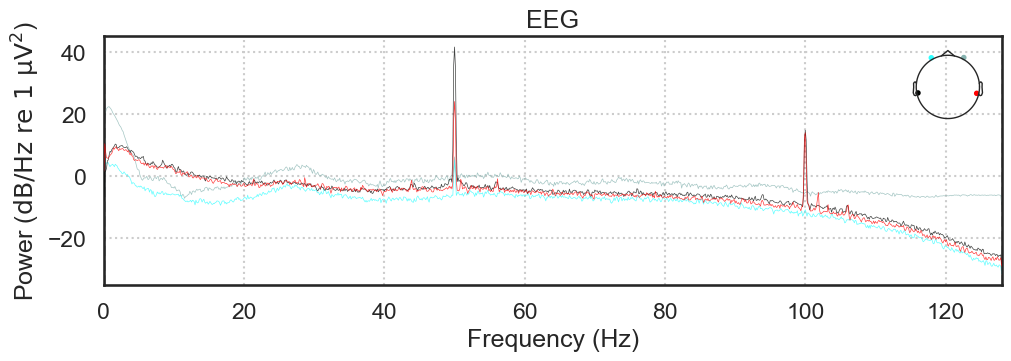

In [3]:
raw.plot_psd()

## Filteriing



In [4]:
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30);

Filtering raw data in 6 contiguous segments
Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


## Epoching



In [5]:
# Create an array containing the timestamps and type of each stimulus (i.e. face or house)
events = find_events(raw)
event_id = {'non-target': 1, 'target': 2}
epochs = Epochs(raw, events=events, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,                                                                           reject={'eeg': 100e-6}, preload=True,                                                       
                verbose=False, picks=[0,1,2,3])

print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)

Finding events on: stim
1161 events found on stim channel stim
Event IDs: [1 2]
sample drop %:  1.5503875968992276


## Epoch average



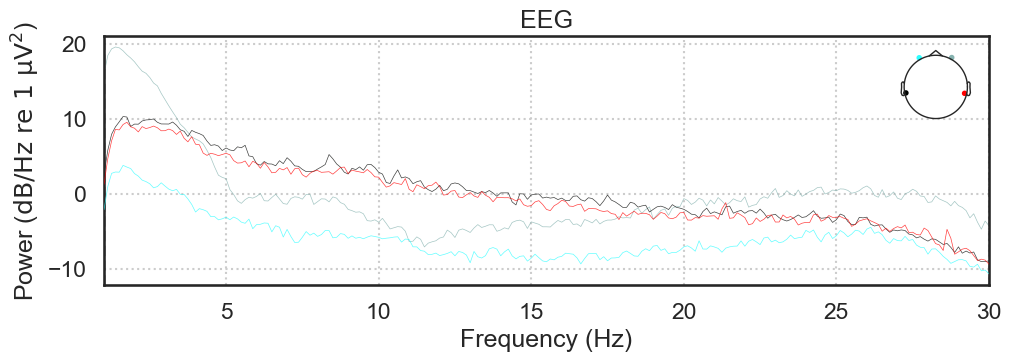

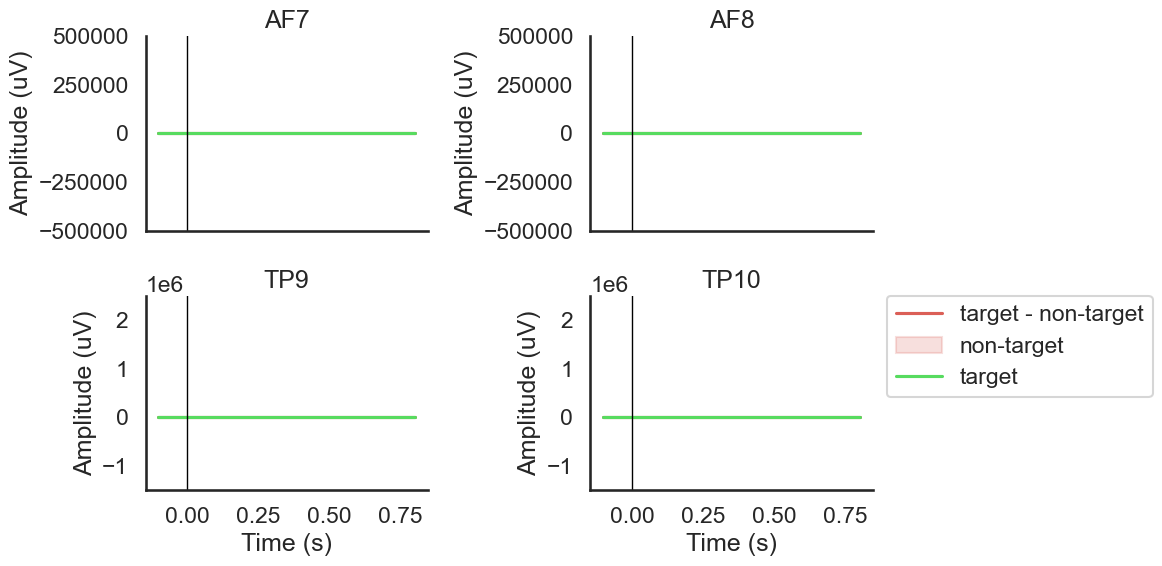

In [6]:
conditions = OrderedDict()
conditions['non-target'] = ['non-target']
conditions['target'] = ['target']
diffwav = ["non-target", "target"]

fig, ax = plot_conditions(epochs, conditions=conditions, 
                          ci=97.5, n_boot=1000, title='',
                          channel_order=[1,0,2,3],ylim=[-2E6,2.5E6],
                          diff_waveform = diffwav)

# Manually adjust the ylims
for i in [0,2]: ax[i].set_ylim([-0.5e6,0.5e6])
for i in [1,3]: ax[i].set_ylim([-1.5e6,2.5e6])

plt.tight_layout()
plt.show()